#### Tidying up old exploratory scripts Mar 2017
added extra stopwords from feature_extraction of terms to 'clean' up the vocab list  
Ref: recipes_runNLTK_LDA_ClassifyPrepDiff_FindCompTokens_v0.ipynb

### Pipeline for performing NLP and running LDA topic modelling on 'cleaner' recipes data 

In [1]:
## for plotting 
# % matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
import numpy as np
import pandas as pd


In [3]:
filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'

In [4]:
DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')

ErrorIDX12 = pd.read_csv(filepath + 'bbcgdfd_idxNOTcleaned12.csv', index_col=0)

### Exclude recipe where idx in Error list

In [5]:
recipeIDList = list(set(list(range(0,10081))).difference(ErrorIDX12.idx))

In [6]:
rTitle = DF0.iloc[recipeIDList].title.to_frame()#.reset_index()
rTitle.index = recipeIDList
rMethod =  DF0.iloc[recipeIDList].method.to_frame()#.reset_index()
rMethod.index = recipeIDList

In [7]:
ingred=[]
IngCnt = []
for id in recipeIDList:
    df1 = pd.read_pickle(filepath + 'bbcgdfd_'+str(id)+'_cleaned.pkl')
    
    tmp = [n for n in df1.name1 if pd.isnull(n)==False]  # name1 <-- cleaned ingredient CRF++ name
    
    ingred.append(' '.join(tmp))
    IngCnt.append([id, df1.shape[0]]) 

In [8]:
IngredCnt = pd.DataFrame(IngCnt, columns=['Ridx','Ningred'])
IngredCnt.index = recipeIDList

In [9]:
Ing0 = pd.DataFrame(ingred, columns=['ingred'], index=recipeIDList)
# Ing0.shape #10051 rows × 1 columns
# Ing0

In [10]:
# filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'
# DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')

DF = DF0.iloc[recipeIDList].copy()

In [11]:
# DF.shape #10051 rows × 14 columns
DF.head()

,title,prepTime,cookTime,prepInfo,recipeInfo,recpYield,prepDifficulty,ingred,method,authorInfo,Nraters,Ratings,imgURL,recipeLink
0,Lemon drizzle cake,15.0,45.0,None,[freezable],Cuts into 10 slices,Easy,"[225g unsalted butter, softened, 225g caster s...",Heat oven to 180C/fan 160C/gas 4. Beat togethe...,Tana Ramsay,1455,4.689520,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/4942/lemon-...
1,Chilli con carne,70.0,NaN,None,[freezable],Serves 4,Easy,"[1 tbsp oil, 1 large onion, 1 red pepper, 2 ga...",Prepare your vegetables. Chop 1 large onion in...,Good Food,1007,4.764150,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3228/chilli...
2,Ultimate chocolate cake,40.0,90.0,Plus baking and cooling time,[freezable],Cuts into 14 slices,Easy,"[200g good quality dark chocolate, about 60% c...",Butter a 20cm round cake tin (7.5cm deep) and ...,Angela Nilsen,971,4.695415,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3092/ultima...
3,Best-ever brownies,NaN,NaN,"Ready in 1 hour, inc cooling (worth every minute)",[],Cuts into 16 squares or 32 triangles,More effort,"[185g unsalted butter, 185g best dark chocolat...",Cut 185g unsalted butter into smallish cubes a...,Orlando Murrin,803,4.809155,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/1223/bestev...
4,Yummy scrummy carrot cake,75.0,NaN,Including 40-45 minutes in the oven.,"[freezable, dairy-free]",Cuts into 15 slices,Easy,"[175g light muscovado sugar, 175ml sunflower o...",Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,Mary Cadogan,789,4.668885,http://www.bbcgoodfood.com/sites/default/files...,http://www.bbcgoodfood.com/recipes/3229/yummy-...


In [12]:
# DF.prepDifficulty.value_counts()
# Easy           8464
# More effort    1364
# A challenge     223
# Name: prepDifficulty, dtype: int64

In [13]:
Ing = pd.concat([rTitle.title,rMethod.method,Ing0, IngredCnt.Ningred, DF.prepTime, DF.cookTime, DF.prepDifficulty],axis=1)
# Ing.shape #(10051, 7)

In [14]:
# Ing.prepTime.isnull().sum(), Ing.cookTime.isnull().sum()
# (1006, 1955)

In [15]:
Ing.prepTime = Ing.prepTime.fillna(Ing.prepTime.median())
Ing.cookTime = Ing.cookTime.fillna(Ing.cookTime.median())

In [16]:
# Ing.to_pickle('RecipesIng4modelling_Dataframe_mar2017.pkl')

### NLTK & NLP

In [17]:
## Create list of 'stopwords' to ignore

In [103]:
ingChars2ignore = ["'s",
                '/1lb', 
                '/4oz',
                '0.5*cucumb',
                '0.5*lemon',
                '100gram',
                '200gram',
                '250gram',
                '25gram',
                '50gram',
                'an-ees',
                'av-oh-car-doh',
                'bah-nah-nah',
                'beat-roota',
                'belli',
                'berri',
                'bio-yogurt',
                "bird's-ey",
                'bloo-bear-e',
                'bran-de',
                'corr-zjet',
                'cos',                
                'de',
                'dri',
                'egg-egg-yolk',
                'el',
                'fat-fre',   
                'fl-ow-er',
                'flouri',
                'frai',
                'ha-riss-ah',
                'halv',
                'hand',
                'huh-ne',
                'jinn',
                'ka-rot',
                'kay-per',   
                'keen-wah',   
                'klo-v',
                'le-mon',
                #'leftov',
                'ly-m',
                'of+0.5',
                'ol-iv',
                'oldest',
                'onli',
                'option',
                'or-ang',
                'oyl',
                'oz',
                'pa-preek-ah',
                'pee-kan',
                'poh-len-tah',
                'q-min',
                'ras',
                'ras-beh-re',
                'ree-cot-a',
                'roh-ket',
                #'serv',   
                'shaohs',
                'spin-atch',
                'toe-mart-oha',   
                'un-yun',
                'undi',
                'vod-ka']

In [19]:
methdChars2ignore = ["'s",
                     '0.5cm',
                     '1-litr',
                     '1.5-litr',
                     '1.5cm',
                     '100g',
                     '100ml',
                     '10cm',
                     '12-hole',
                     '120c/100c',
                     '120c/gas',
                     '125ml',
                     '12cm',
                     '130c/gas',
                     '140c',
                     '140c/120c',
                     '140c/fan',
                     '140c/gas',
                     '140g',
                     '150c/130c',
                     '150c/fan',
                     '150g',
                     '150ml',
                     '15cm',
                     '160c',
                     '160c/',
                     '160c/140c',
                     '160c/fan',
                     '160c/gas',
                     '170c',
                     '170c/150c',
                     '170c/gas',
                     '180c',
                     '180c/',
                     '180c/160c',
                     '180c/convent',
                     '180c/fan',
                     '180c/gas',
                     '18cm',
                     '190c/170c',
                     '190c/fan',
                     '190c/gas',
                     '1cm',
                     '1kg',
                     '2-litr',
                     '2.5cm',
                     '200c',
                     '200c/',
                     '200c/180c',
                     '200c/fan',
                     '200c/gas',
                     '200g',
                     '200ml',
                     '20cm',
                     '220c/200c',
                     '220c/fan',
                     '220c/gas',
                     '22cm',
                     '230c/210c',
                     '23cm',
                     '240c/220c',
                     '24cm',
                     '250g',
                     '250ml',
                     '25cm',
                     '25g',
                     '28cm',
                     '2cm',
                     '2lb',
                     '300ml',
                     '30cm',
                     '350ml',
                     '35cm',
                     '3cm',
                     '4/fan',
                     '400ml',
                     '40cm',
                     '4cm',
                     '5/fan',
                     '500g',
                     '500ml',
                     '50g',
                     '50ml',
                     '5cm',
                     '5mm',
                     '6/fan',
                     '600ml',
                     '6cm',
                     '7/fan',
                     '75g',
                     '75ml',
                     '7cm',
                     '85g',
                     '8cm',
                     '900g',
                     '9cm',
                     'gas', 
                     'fan/', 
                     'fan/ga']

In [104]:
## Create list of 'stopwords' to ignore

import re
import os
import codecs

import nltk
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

import string

for s in string.punctuation: #'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    stopwords.extend(s)

    stopwords.extend(['serve','plus','handful','small'])
    
    ##updated model removed more chars
    stopwords.extend(ingChars2ignore)
    stopwords.extend(methdChars2ignore)
    
    

In [21]:
# stopwords

### Define tokenizers/Stemmer

In [22]:
## Define tokenizers/Stemmer

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# define here a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


### LDA --  
Refs: 
- http://scikit-learn.org/stable/modules/decomposition.html  
- http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-topics-extraction-with-nmf-lda-py   

- https://github.com/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb  

LatentDirichletAllocation implements online variational Bayes algorithm and supports both online and batch update method.   
While batch method updates variational variables after each full pass through the data, online method updates variational variables from mini-batch data points.  

** *Note:**   
Although online method is guaranteed to converge to a local optimum point, the quality of the optimum point and the speed of convergence may depend on mini-batch size and attributes related to learning rate setting.  

*When LatentDirichletAllocation is applied on a “document-term” matrix, the matrix will be decomposed into a “topic-term” matrix and a “document-topic” matrix.   
While “topic-term” matrix is stored as components_ in the model, “document-topic” matrix can be calculated from transform method.*  

- http://stackoverflow.com/questions/22433884/python-gensim-how-to-calculate-document-similarity-using-the-lda-model  
- http://datascience.stackexchange.com/questions/678/what-are-some-standard-ways-of-computing-the-distance-between-documents  

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html   

In [23]:
from __future__ import print_function

# import pyLDAvis
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.decomposition import LatentDirichletAllocation

In [105]:
itf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                 tokenizer=tokenize_and_stem, #tokenize_only,
                                 stop_words = stopwords, #
                                 lowercase = True,
                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
                                 max_df = 0.5, 
                                 min_df = 15) #, 10
                                #ngram_range=(1, 3))

mtf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                 tokenizer=tokenize_and_stem, #tokenize_only,
                                 stop_words = stopwords, #
                                 lowercase = True,
                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
                                 max_df = 0.5, 
                                 min_df = 20)#, 0.1
                                #ngram_range=(1, 3))



In [106]:
## Term Frequency

# Titledtm_tf = ttf_vectorizer.fit_transform(Ing.title)

Ingdtm_tf = itf_vectorizer.fit_transform(Ing.ingred)

Methoddtm_tf = mtf_vectorizer.fit_transform(Ing.method)

# print(Titledtm_tf.shape)
print(Ingdtm_tf.shape)  #(10051, 741) ##(10051, 678)
print(Methoddtm_tf.shape) #(10051, 1638) ##(10051, 1531)


(10051, 678)
(10051, 1531)


In [107]:
Itf_feature_names = itf_vectorizer.get_feature_names()  ## use with lda_tf.components_
Itf_feature_names # check for chars to add to stopwords ***


['agav',
 'ale',
 'all-butt',
 'allspic',
 'almond',
 'altern',
 'amaretti',
 'anchovi',
 'anis',
 'appl',
 'apricot',
 'artichok',
 'artichoke-heart',
 'asparagus',
 'aubergin',
 'avocado',
 'babi',
 'back',
 'bacon',
 'bag',
 'baguett',
 'bake',
 'ball',
 'balsam',
 'banana',
 'bar',
 'barbecu',
 'barley',
 'base',
 'basil',
 'basmati',
 'bass',
 'bay',
 'bean',
 'beansprout',
 'beef',
 'beer',
 'beetroot',
 'bicarbon',
 'big',
 'bio',
 'biscuit',
 'black',
 'blackberri',
 'blanch',
 'block',
 'blossom',
 'blue',
 'blueberri',
 'boil',
 'bok-choi',
 'bone',
 'boneless',
 'bouillon',
 'bramley',
 'brandi',
 'bread',
 'breadcrumb',
 'breast',
 'brie',
 'brioch',
 'british',
 'broad',
 'broccoli',
 'brown',
 'brush',
 'brussel',
 'bulb',
 'bulghar',
 'bun',
 'bunch',
 'burger',
 'butter',
 'buttermilk',
 'butternut',
 'button',
 'cabbag',
 'cajun',
 'cake',
 'candi',
 'cannellini',
 'caper',
 'caramel',
 'caraway',
 'cardamom',
 'carrot',
 'carton',
 'case',
 'cashew',
 'cassi',
 'caste

In [27]:
Mtf_feature_names = mtf_vectorizer.get_feature_names()  ## use with lda_tf.components_
Mtf_feature_names  # check for chars to add to stopwords ***


['abl',
 'abov',
 'absorb',
 'accompani',
 'accord',
 'achiev',
 'across',
 'ad',
 'addit',
 'adjust',
 'adult',
 'advanc',
 'agav',
 'ahead',
 'air',
 'airtight',
 'al',
 'alcohol',
 'allow',
 'allspic',
 'almond',
 'almost',
 'along',
 'alongsid',
 'alreadi',
 'also',
 'altern',
 'although',
 'amaretti',
 'among',
 'amount',
 'anchovi',
 'angl',
 'ani',
 'anis',
 'anoth',
 'apart',
 'appear',
 'appl',
 'approx',
 'approxim',
 'apricot',
 'area',
 "aren't",
 'aroma',
 'aromat',
 'around',
 'arrang',
 'artichok',
 'asid',
 'ask',
 'asparagus',
 'assembl',
 'attach',
 'aubergin',
 'avocado',
 'avoid',
 'away',
 'babi',
 'back',
 'bacon',
 'bag',
 'baguett',
 'bake',
 'ball',
 'balloon',
 'balsam',
 'bamboo',
 'banana',
 'bar',
 'barbecu',
 'bare',
 'barley',
 'base',
 'bash',
 'basil',
 'basin',
 'basmati',
 'bast',
 'batch',
 'batter',
 'bay',
 'bbq',
 'bean',
 'beansprout',
 'beat',
 'beaten',
 'beater',
 'beauti',
 'becaus',
 'becom',
 'beef',
 'beer',
 'beetroot',
 'befor',
 'begin'

In [28]:
## Term Frequency | inv Doc Frequency

# ttfidf_vectorizer = TfidfVectorizer(**ttf_vectorizer.get_params())
# Titledtm_tfidf = itfidf_vectorizer.fit_transform(Ing.title)

# itfidf_vectorizer = TfidfVectorizer(**itf_vectorizer.get_params())
# Ingdtm_tfidf = itfidf_vectorizer.fit_transform(Ing.ingred)

# mtfidf_vectorizer = TfidfVectorizer(**mtf_vectorizer.get_params())
# Methoddtm_tfidf = mtfidf_vectorizer.fit_transform(Ing.method)


# # print(Titledtm_tfidf.shape)
# print(Ingdtm_tfidf.shape)
# print(Methoddtm_tfidf.shape)

# (10051, 684)
# (10051, 1540)

### Run LDA

#### LDA on Ingredients

In [108]:
## rerun old without extra stopwords
# ilda_tf = LatentDirichletAllocation(n_topics=100,random_state=0) 

##updated
ilda_tf = LatentDirichletAllocation(n_topics=100, #60, #50, #100, 
                                    max_iter=200, #100, #200,
                                    learning_method='batch', learning_offset=50.,
                                    n_jobs=3, verbose=2,random_state=0) 



ilda_tf.fit(Ingdtm_tf)
print(ilda_tf.score(Ingdtm_tf))


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]

-12456906.1324


#### LDA on Methods

In [30]:
## rerun old without extra stopwords
# mlda_tf = LatentDirichletAllocation(n_topics=80,random_state=0) 


mlda_tf = LatentDirichletAllocation(n_topics=80, #30, #40, #80,  
                                    max_iter=200, #200,
                                    learning_method='batch', learning_offset=50.,
                                    n_jobs=3, verbose=2,random_state=0) 

mlda_tf.fit(Methoddtm_tf)
print(mlda_tf.score(Methoddtm_tf))


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   12.5s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   10.2s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.0s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.3s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.9s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.7s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.4s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.3s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.1s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.6s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    5.2s finished
[Parallel(n_jobs=3)]

-55412117.0108


### Retrieving Terms for Topics from model.components_

In [31]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {0}:".format(topic_idx))
        print(" ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#### Ingredient Topics & top terms

In [109]:
# new
print_top_words(ilda_tf, Itf_feature_names, 15)

Topic 0:
cornflour egg-whit sugar blackberri poppi elderflow cordial eat gooseberri flower gelatin leav liqueur edibl ready-mad
Topic 1:
orang juic marmalad back sugar chunki pancak granari quarter drain lean fraich food fondant flower
Topic 2:
vanilla sugar extract cream ice serv custard raspberri butter bar milk egg clot dark-chocol strawberri
Topic 3:
fennel bulb seed toast lemon oliv nigella tamarind stalk flat-leaf flatbread flatleaf french flesh floret
Topic 4:
bread serv white crusti butter egg oliv spray clam sachet free-rang fraich food fondant flower
Topic 5:
chop rapese serv rough wheat bulghar bone coars squeez hock neck gammon floret fondant flower
Topic 6:
babi spinach prawn raw peel leav king tiger dip jumbo firm oliv egg spring-onion garam
Topic 7:
sugar caster pod vanilla pistachio milk butter egg fast-act gelatin whiski sachet bag free-rang leav
Topic 8:
brown sugar soft soda light bicarbon flour butter egg self-rais cinnamon treacl muscovado buttermilk sunflow
Topic 

In [110]:
topics_ingred = []
ingMtx = ilda_tf.transform(Ingdtm_tf)
# len(mtdMtx)
len(ingMtx[0])

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished


100

In [111]:
ingMtx_df = pd.DataFrame(ingMtx)
topics_ingred=[]
for row, val in ingMtx_df.iterrows():
    topics_ingred.append(val.argmax())
    
pd.Series(topics_ingred).value_counts()#.plot.bar(figsize=(20,10))

67    682
92    504
81    408
29    379
2     295
35    279
34    274
78    267
25    258
33    255
65    245
91    220
51    202
76    199
7     197
8     187
66    185
56    151
95    140
69    135
63    135
45    129
58    122
68    120
86    119
44    119
87    118
70    117
14    115
62    113
     ... 
11     47
71     46
9      44
90     42
40     42
42     41
16     35
83     35
30     34
1      33
23     30
39     28
26     26
93     25
17     20
10     16
20     13
54     13
64     13
80     11
49     11
24     10
5      10
19      9
97      6
28      5
99      5
36      4
12      4
85      3
dtype: int64

#### Method Topics & top terms

In [37]:
# new
print_top_words(mlda_tf, Mtf_feature_names, 20)

Topic 0:
butter melt shell mussel remain filo half ani open liver discard warm toast cover marmalad brioch rest brown third prune
Topic 1:
potato mash boil drain tender water season salt larg leav well onion meanwhil put bring cover cool butter return simmer
Topic 2:
care veri take time ani turn keep back start one use spoon tip don't let leav give much put see
Topic 3:
tomato basil season oliv courgett sauc garlic scatter leav half pepper top drizzl parmesan pesto remain mozzarella cherri oregano littl
Topic 4:
lemon juic zest squeez oliv parsley wedg half season remain mix tbsp drizzl tast toss mackerel caper togeth garlic bowl
Topic 5:
lamb rosemari garlic rest leav juic broad oliv meat pink juici babi season kebab warm bean fat well turn mint
Topic 6:
grill high microwav turn place put medium golden hot brown meanwhil side line togeth light halfway bubbl start flash highest
Topic 7:
squash beef minc brown parsnip sauc spoon fri risotto break parmesan tip season defrost onion mash w

In [38]:
topics_method = []
mtdMtx = mlda_tf.transform(Methoddtm_tf)
# len(mtdMtx)
len(mtdMtx[0])

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    4.8s finished


80

In [39]:
mtdMtx_df = pd.DataFrame(mtdMtx)
topics_method=[]
for row, val in mtdMtx_df.iterrows():
    topics_method.append(val.argmax())
    
pd.Series(topics_method).value_counts().head(50)


40    648
68    582
30    422
10    420
18    360
11    342
45    326
26    325
59    310
33    301
39    276
17    244
13    231
1     231
52    224
56    211
62    196
22    192
28    189
3     188
25    183
64    183
20    182
55    177
31    176
41    164
35    161
19    157
44    149
67    145
48    145
50    142
71    130
24    129
75     96
72     95
8      94
2      90
51     90
43     80
70     74
53     67
12     66
27     63
65     59
14     59
16     51
36     47
34     45
15     43
dtype: int64

In [40]:
# mtdMtx_df

In [41]:
np.where(np.array(topics_method)==2)

(array([    1,     3,    47,   113,   194,   413,   468,   819,   943,
          976,  1036,  1207,  1266,  1663,  1776,  2057,  2190,  2282,
         2404,  2417,  2433,  2507,  2873,  2919,  2960,  3174,  3231,
         3703,  3775,  3831,  3884,  3912,  3923,  4063,  4172,  4628,
         4724,  4986,  4996,  5428,  5508,  5597,  5650,  5682,  5924,
         5977,  6115,  6266,  6356,  6360,  6457,  6490,  6495,  6525,
         6675,  6697,  6790,  7245,  7272,  7342,  7386,  7416,  7486,
         7504,  7886,  7942,  7999,  8062,  8112,  8341,  8373,  8425,
         8468,  8469,  8507,  8733,  8739,  8803,  9000,  9063,  9126,
         9285,  9372,  9480,  9506,  9624,  9675,  9755, 10019, 10026]),)

In [42]:
Ing.method[3884]

'Put all the butter beans in a large bowl and cover with plenty of cold water so they have room to swell up. Leave to soak overnight. Drain the beans. Shuck off and discard the skins by pinching the beans between finger and thumb – it’s a laborious job, but worth it. Put the beans in a colander, rinse and shake off the excess water. Heat the oil in a pan and fry the onion and garlic for 1-2 minutes. Tip in the carrots and celery and fry gently for 2-3 minutes. Add the beans, stock, bay and thyme with some pepper, and bring to the boil. Reduce the heat, cover and simmer for 20-25 minutes, skimming off any scum, until the beans are soft. Cool for 10 minutes, discard the bay and thyme, then whizz the soup in a food processor until smooth. (You will probably have to do this in batches.) Return the soup to the rinsed pan and bring to the boil. Check for seasoning, then serve with a drizzle of chilli oil and a sprinkling of thyme leaves.'

### pyLDAvis
- http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

In [43]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


#### NOTE the topic clusters here don't correspond to the LDA topics using sklearn_LDA above... 

In [112]:
pyldavisItf = pyLDAvis.sklearn.prepare(ilda_tf, Ingdtm_tf, itf_vectorizer) #, mds='mmds') #mds='tsne')
pyLDAvis.sklearn.prepare(ilda_tf, Ingdtm_tf, itf_vectorizer, mds='mmds')

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
67     4.228269        1       1 -0.249559 -0.254119
92     3.118142        1       2  0.099648 -0.189933
34     2.646000        1       3  0.223943  0.446180
29     2.636372        1       4 -0.320566 -0.197670
81     2.607482        1       5  0.125244  0.226298
65     1.875197        1       6  0.188591 -0.215503
33     1.873926        1       7 -0.077199 -0.291559
78     1.849481        1       8  0.173388 -0.044118
2      1.777460        1       9 -0.149858 -0.300058
8      1.742184        1      10 -0.245952 -0.325286
7      1.706311        1      11 -0.196163 -0.370704
91     1.698033        1      12  0.236554  0.340683
76     1.620199        1      13  0.290013  0.168865
43     1.551455        1      14  0.360348 -0.264649
66     1.544412        1      15  0.318490  0.086519
35     1.470527        1      16  0.214245  0.225009
25     1.464649        1      17  0.220311  0.110630
69     1.461671        1      18  0.136540  0.031212
56     1.436141        1      19 -0.014781  0.333272
63     1.356731        1      20 -0.052087  0.222715
86     1.244049        1      21 -0.105466  0.049159
70     1.238463        1      22 -0.061955  0.137704
51     1.224944        1      23  0.208454 -0.097642
9      1.188281        1      24  0.360246 -0.335161
82     1.173312        1      25 -0.399141 -0.094889
44     1.142937        1      26 -0.392378  0.052916
62     1.141346        1      27  0.369175  0.093491
48     1.119920        1      28  0.147589 -0.312271
98     1.096051        1      29  0.267366  0.428490
87     1.081252        1      30 -0.003321 -0.432733
...         ...      ...     ...       ...       ...
0      0.694228        1      71 -0.140424 -0.481570
22     0.693919        1      72  0.012533  0.048001
55     0.685644        1      73  0.040216  0.285311
31     0.684252        1      74 -0.416251 -0.219935
27     0.663259        1      75  0.064683  0.203168
52     0.659316        1      76 -0.100214 -0.519058
59     0.658299        1      77  0.073853 -0.409881
5      0.654090        1      78 -0.255674  0.442780
94     0.634579        1      79 -0.447176 -0.269429
3      0.624857        1      80  0.402121  0.348307
47     0.608004        1      81 -0.481458 -0.055984
85     0.607595        1      82  0.511080 -0.191487
54     0.598258        1      83  0.534650 -0.090233
75     0.583515        1      84  0.389898  0.274757
49     0.582870        1      85  0.542123 -0.020758
18     0.573905        1      86  0.066321 -0.482485
20     0.539690        1      87  0.448150 -0.161496
39     0.536893        1      88 -0.556069  0.001273
97     0.453922        1      89 -0.101176  0.544888
16     0.441468        1      90 -0.484493 -0.131825
36     0.440988        1      91  0.433122 -0.340034
40     0.391527        1      92  0.295902  0.292261
19     0.374689        1      93 -0.205976  0.464609
10     0.365544        1      94  0.439837 -0.238837
80     0.351190        1      95  0.299339 -0.409648
99     0.346355        1      96 -0.461839  0.116927
64     0.346059        1      97 -0.303575  0.434813
28     0.334734        1      98 -0.406869  0.354437
24     0.308190        1      99 -0.377933 -0.387818
12     0.293083        1     100 -0.520232  0.077022

[100 rows x 5 columns], topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
317    Default  2392.000000       lemon  2392.000000  30.0000  30.0000
593    Default  4472.000000       sugar  4472.000000  29.0000  29.0000
223    Default  2469.000000       flour  2469.000000  28.0000  28.0000
628    Default  2009.000000      tomato  2009.000000  27.0000  27.0000
100    Default  1343.000000     chicken  1343.000000  26.0000  26.0000
387    Default  3981.000000        oliv  3981.000000  25.0000  25.0000
238    Default  2825.00000

In [45]:
# pyLDAvis.show(pyldavisItf)

# Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
#       to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
#       See more information at http://pyLDAvis.github.io/quickstart.html .


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [31/Mar/2017 23:31:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2017 23:31:57] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2017 23:31:59] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2017 23:32:00] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2017 23:32:00] code 404, message Not Found
127.0.0.1 - - [31/Mar/2017 23:32:00] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


In [122]:
pyldavisMtf = pyLDAvis.sklearn.prepare(mlda_tf, Methoddtm_tf, mtf_vectorizer, mds = 'mmds') #mds='mmds')
pyLDAvis.sklearn.prepare(mlda_tf, Methoddtm_tf, mtf_vectorizer, mds = 'mmds') 

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    3.4s finished


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
68     5.206799        1       1  0.070690 -0.134914
30     2.948625        1       2 -0.185780  0.090434
2      2.767738        1       3  0.255782  0.041721
13     2.709553        1       4  0.011987 -0.098069
44     2.661143        1       5  0.246419 -0.136363
40     2.593345        1       6 -0.182783 -0.015200
45     2.545616        1       7  0.052362  0.121202
39     2.469463        1       8  0.085941 -0.226942
64     2.059654        1       9  0.016999  0.251149
10     2.050321        1      10 -0.106174  0.309230
56     1.998595        1      11 -0.140461  0.421566
59     1.975019        1      12 -0.142900 -0.251178
26     1.927577        1      13 -0.093050  0.135561
48     1.923287        1      14  0.208140 -0.067744
17     1.881435        1      15  0.051199  0.178420
18     1.787088        1      16 -0.146735  0.243079
1      1.681333        1      17 -0.234490  0.290604
11     1.655587        1      18 -0.170240  0.185007
31     1.617648        1      19  0.062836 -0.021821
24     1.605014        1      20  0.035308 -0.200422
3      1.594670        1      21 -0.346892  0.083617
50     1.592367        1      22  0.061845 -0.349670
55     1.564714        1      23 -0.057041 -0.304442
67     1.531526        1      24  0.175902 -0.354238
33     1.481439        1      25 -0.187314  0.331011
51     1.431949        1      26  0.317276  0.027063
19     1.411768        1      27  0.140537 -0.274762
62     1.357805        1      28 -0.073850 -0.058320
75     1.341133        1      29 -0.115505 -0.418307
71     1.312980        1      30  0.275860 -0.172111
...         ...      ...     ...       ...       ...
12     0.847483        1      51 -0.301370 -0.281774
37     0.845474        1      52 -0.299684 -0.068300
14     0.816110        1      53  0.264258  0.127672
60     0.812225        1      54 -0.503183  0.147352
69     0.803990        1      55 -0.396689  0.249079
42     0.775784        1      56  0.352591  0.194247
7      0.733799        1      57  0.026508  0.400480
35     0.733327        1      58  0.140032  0.314183
73     0.697748        1      59  0.307441  0.394453
74     0.675910        1      60  0.239048  0.431830
0      0.652942        1      61 -0.282021  0.457401
16     0.652217        1      62  0.037382 -0.484614
36     0.625639        1      63 -0.223518 -0.351396
58     0.604057        1      64  0.530101  0.100227
32     0.595341        1      65  0.211224  0.525999
43     0.590967        1      66 -0.223426 -0.178233
6      0.552217        1      67  0.495441 -0.106696
21     0.506903        1      68 -0.349726 -0.315871
29     0.492508        1      69 -0.396267  0.350843
15     0.489553        1      70  0.314787  0.294863
63     0.452171        1      71  0.464421  0.199112
38     0.451161        1      72 -0.225145 -0.496735
77     0.448884        1      73 -0.458207  0.019789
5      0.435812        1      74 -0.425789 -0.253894
57     0.412181        1      75  0.244125 -0.490222
46     0.389144        1      76  0.347189 -0.381328
9      0.385289        1      77 -0.556872 -0.186299
23     0.353109        1      78  0.487097 -0.297031
61     0.254713        1      79 -0.057441  0.556779
79     0.188205        1      80  0.462148  0.341589

[80 rows x 5 columns], topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
63    Default  8452.000000        bake  8452.000000  30.0000  30.0000
166   Default  4962.000000      butter  4962.000000  29.0000  29.0000
214   Default  2908.000000     chicken  2908.000000  28.0000  28.0000
888   Default  7616.000000        oven  7616.000000  27.0000  27.0000
1396  Default  5110.000000         tin  5110.000000  26.0000  26.0000
704   Default  2974.000000       lemon  2974.000000  25.0000  25.0000
998   Default  3138.000000      pot

In [123]:
# pyLDAvis.show(pyldavisMtf)



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [03/Apr/2017 21:38:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:38:33] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:38:34] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:38:34] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:39:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:39:01] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:39:01] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:39:01] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2017 21:39:02] code 404, message Not Found
127.0.0.1 - - [03/Apr/2017 21:39:02] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


### SAVE LDA IN/OUTPUTS

In [48]:
import pickle

# fruits = dict(banana=0, pear=2, apple=6)
# snakes = ['cobra', 'viper', 'rattler']

# with open('stuff.pkl', 'wb') as f:
#     pickle.dump(fruits, f)
#     pickle.dump(snakes, f)

# with open('stuff.pkl', 'rb') as f:
#     food = pickle.load(f)
#     pets = pickle.load(f)

# food
# {'pear': 2, 'apple': 6, 'banana': 0}
# pets
# ['cobra', 'viper', 'rattler']


# ## Rerun&Save Oldversion without extra stopwords 31Mar2017
# with open('bbcgfd_ilda_tf_100Ingredtopics_v01.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# with open('bbcgfd_mlda_tf_80methodtopics_v01.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)
    

# ## version 30Mar2017 v2
# ## version 03Apr2017 v3?
# with open('bbcgfd_ilda_tf_100Ingredtopics_v3.pkl', 'wb') as f:?
# with open('bbcgfd_ilda_tf_100Ingredtopics_v2.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# with open('bbcgfd_mlda_tf_80methodtopics_v2.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)

### Ilustrative example -- Document-Topics:

In [113]:
# Ing2test = Ing.ix[[1,2,5,12,16,27,2317,4016,4986,6510,6996]]  #6978 #555
Ing2test = Ing.ix[[1,5,12,882,299, 2317, 4442, 4986, 4016,6510,2,16,6996,469]]  #6978 #555

# Ing2test = Ing.ix[[1, 150, 333, 12,  5, 8998, 898,1224, 2317,4016,4986,6510, 2,16,27,6996,469]] #6978
Ing2test.reset_index().title

0                               Chilli con carne
1                    Chicken & chorizo jambalaya
2                                Chicken biryani
3                     Salmon & ginger fish cakes
4                            Ultimate fish cakes
5          Lemon & rosemary crusted fish fillets
6                             Spicy lamb patties
7                Pork with apple & frizzled sage
8     Pulled pork with Mexican almond mole sauce
9         Christmas ham with sticky ginger glaze
10                       Ultimate chocolate cake
11                        Chocolate brownie cake
12                      Double chocolate eclairs
13              Decadent chocolate truffle torte
Name: title, dtype: object

In [114]:
iX_vec = itf_vectorizer.transform(Ing2test.ingred)
# print(iX_vec.shape) #(11, 741)

iX_ldatrans = pd.DataFrame(ilda_tf.transform(iX_vec))

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished


In [115]:
iX_ldatrans.index = Ing2test.reset_index().title

In [116]:
# iX_ldatrans
iX_ldatrans.transpose()

title,Chilli con carne,Chicken & chorizo jambalaya,Chicken biryani,Salmon & ginger fish cakes,Ultimate fish cakes,Lemon & rosemary crusted fish fillets,Spicy lamb patties,Pork with apple & frizzled sage,Pulled pork with Mexican almond mole sauce,Christmas ham with sticky ginger glaze,Ultimate chocolate cake,Chocolate brownie cake,Double chocolate eclairs,Decadent chocolate truffle torte
0,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.047409,0.000833
1,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.027297,0.000667,0.000345,0.000556,0.000400,0.000833
2,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.267458,0.000833
3,0.000323,0.000588,0.040400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.000400,0.000833
4,0.000323,0.000588,0.000400,0.000909,0.000357,0.285082,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.000400,0.000833
5,0.000323,0.000588,0.060398,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.000400,0.000833
6,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.000400,0.000833
7,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.087322,0.000833
8,0.000323,0.000588,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.154513,0.147308,0.113432,0.000833
9,0.000323,0.112122,0.000400,0.000909,0.000357,0.001250,0.000588,0.000714,0.000270,0.000667,0.000345,0.000556,0.000400,0.000833


In [53]:
## for plotting 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Colormap  is not recognized. 
Possible values are: 
    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r


/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


(array([  0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
         45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5,
         90.5,  95.5]), <a list of 20 Text xticklabel objects>)

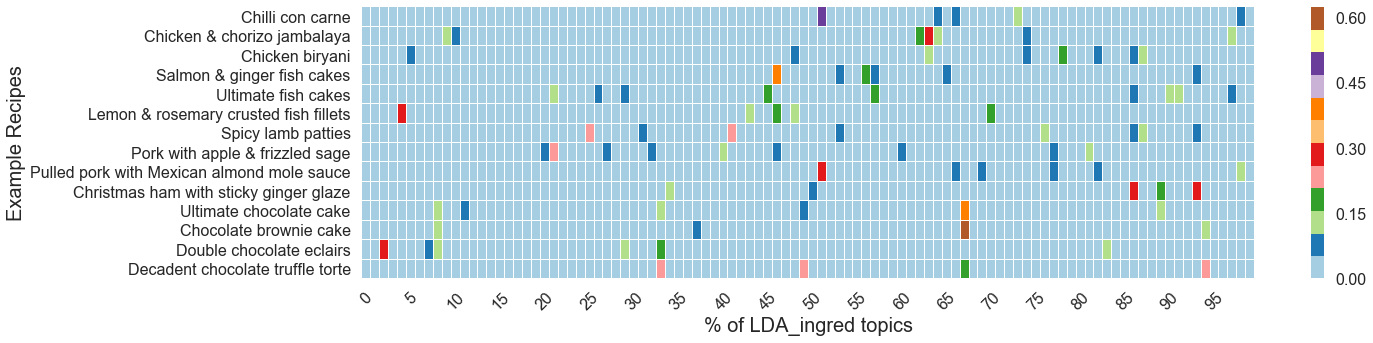

In [117]:
# plt.figure(figsize=(50,11))
sns.set_context("poster")
plt.figure(figsize=(20, 5))
# fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap = "Vega20c_r",linewidths=.005, vmin=0)#, vmax=0.75); #cmap = "viridis_r"
fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap = "Paired",linewidths=.005, vmin=0);#, vmax=.7); #cmap = "viridis_r"
# fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap='Reds',linewidths=.005, linecolor='white', vmin=0);#, vmax=1) #, center=1);
# fig.set_axis_()
sns.set(font_scale=0.6)
plt.xlabel('% of LDA_ingred topics', fontsize=20)
plt.ylabel('Example Recipes', fontsize=20)
plt.xticks(rotation=45) 
# plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')



In [ ]:
# ## Fish
# Topic 46:
# fillet rice salmon basmati spring-onion skinless oliv butter glitter flatleaf fondant flower flour gluten-fre floret
# Topic 45:
# dill cream sour lemon horseradish salmon smoke fillet mackerel oliv trout serv cucumb spring-onion wedg
# Topic 57:
# mustard dijon watercress mayonnais white spring-onion crabmeat radish egg cucumb celeriac iceberg-lettuc buttermilk bag sourdough

# Topic 4:
# bread serv white crusti butter egg oliv spray clam sachet free-rang fraich food fondant flower


# ## Lamb
# Topic 25:
# lamb chickpea oliv lemon couscous mint onion tomato harissa coriand red past minc tahini leav

# ## Pork
# Topic 77:
# appl cider vinegar sugar roll bramley shoulder pork onion malt flesh torn cumberland joint waxi

# ## mole / chilli con carne
# Topic 51:
# tortilla bean red coriand tomato chilli onion lime kidney corn avocado chipotl cream sour past
# Topic 66:
# carrot celeri pure tomato stick onion oliv garlic stock haricot sugar flesh flower flour food
# Topic 98:
# cumin coriand ground garlic onion clove fenugreek sunflow ready-cook pickl crush pinto wing well see


# ##
# Topic 86:
# leaf bay peppercorn thyme leav onion butter young whole coars joint milk glace flesh food

# ##
# Topic 93:
# ginger piec root stem groundnut ball crystallis flatbread flatleaf five-spic french free-rang fraich flake food


# ## Chocolatey
# Topic 67:
# sugar flour powder egg butter self-rais bake caster milk cocoa extract plain vanilla dark-chocol ice
# Topic 33:
# cream doubl butter dark-chocol milk sugar whip serv egg coffe liqueur liquid glucos squar disaronno
# Topic 8:
# brown sugar soft soda light bicarbon flour butter egg self-rais cinnamon treacl muscovado buttermilk sunflow
# Topic 2:
# vanilla sugar extract cream ice serv custard raspberri butter bar milk egg clot dark-chocol strawberri


# ## Chicken
# Topic 63:
# chicken stock thigh onion garlic butter duck liver drumstick sunflow chorizo cornichon ring food fondant
# Topic 74:
# breast chicken boneless skinless oliv blue onion sunflow strip zest flour free-rang fraich food fondant
# Topic 78:
# coriand turmer chilli onion ginger garlic seed masala powder garam rice clove veget red tomato




In [ ]:
# ## Old LDA but with upgraded python3 without extra stopwords

# ## soup/concarne


# ## chicken
# Topic 82:
# chicken breast stock lemon fillet trout butter loin garlic oliv sunflow chop korma serv venison


# ##sausage


# ## fish
# Topic 34:
# fillet fish skinless white tuna lemon cod breadcrumb oliv parsley spring-onion huh-ne tomato sweetcorn bread
# # Topic 30:
# # rosemari oliv sprig garlic leg clove thyme lemon lamb butter oyl ol-iv leav onion parsley

# ##
# Topic 51:
# bay leaf celeri carrot onion stick thyme stock butter chicken garlic leav veget parsley clove
# ##
# Topic 16:
# parsnip potato butter haddock milk leek smoke celeriac parsley onion flouri carrot swede egg stock


# ## chocolatey
# Topic 14:
# light muscovado sugar golden syrup butter madeira oat raisin cinnamon ready-to-eat appl nest cranberri larg
# Topic 15:
# sugar cocoa powder dark-chocol butter egg flour cream coffe plain chocol vanilla milk caster doubl


In [ ]:
## you can retrieve by first transforming Ing.indred then selecting recipe indices later (instead of vice versa as above)

In [57]:
iX_vec2 = itf_vectorizer.transform(Ing.ingred)
# print(iX_vec.shape) #(11, 741)

iX_ldatrans2 = pd.DataFrame(ilda_tf.transform(iX_vec2))

# iX_ldatrans2

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished


In [58]:
np.unique([ np.argmax(iX_ldatrans2[n]) for n in list(range(100)) ])

array([  15,  437,  449,  496,  509,  617,  672,  793,  923,  967, 1116,
       1148, 1241, 1311, 1376, 1397, 1686, 1875, 2006, 2052, 2257, 2289,
       2414, 2444, 2545, 2609, 2611, 2632, 2736, 2799, 2931, 2946, 3090,
       3383, 3409, 3788, 3882, 3906, 4116, 4289, 4313, 4412, 4454, 4651,
       4873, 5115, 5129, 5232, 5473, 5723, 5884, 6020, 6160, 6193, 6281,
       6305, 6362, 6457, 6634, 6653, 6905, 7116, 7263, 7277, 7412, 7432,
       7508, 7566, 7630, 7853, 7858, 7969, 8091, 8300, 8301, 8319, 8405,
       8600, 8608, 8802, 8816, 8928, 8979, 9086, 9115, 9177, 9319, 9380,
       9393, 9431, 9439, 9452, 9512, 9726, 9728, 9859, 9865, 9882, 9937,
       9941])

In [59]:
iX_ldatrans2i = iX_ldatrans2.ix[[1,2,5,12,16,27,146, 555, 1224, 2317,4016,4986,6510,6996, 8998]]

iX_ldatrans2i.index = Ing.title.ix[[1,2,5,12,16,27,146, 555, 1224, 2317,4016,4986,6510,6996, 8998]]

# iX_ldatrans2i.transpose()

/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/hrm/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


(array([  0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
         45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5,
         90.5,  95.5]), <a list of 20 Text xticklabel objects>)

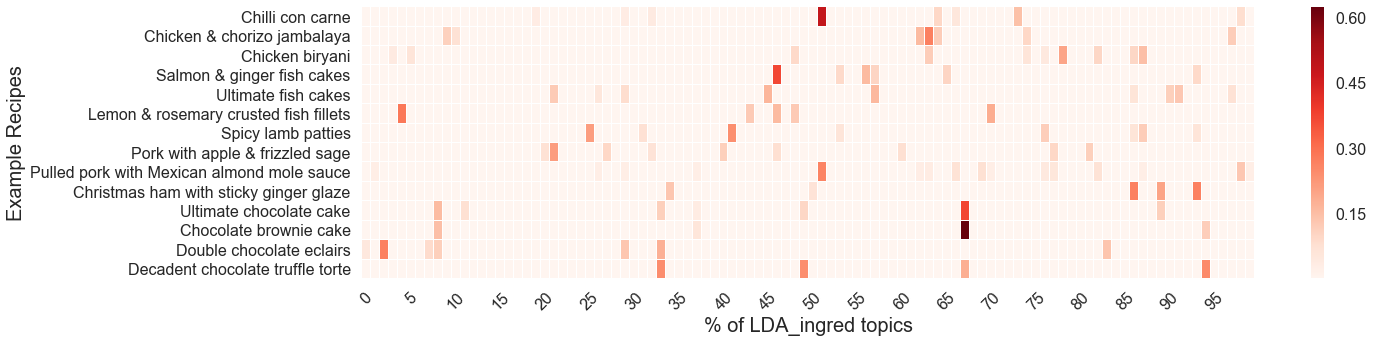

In [60]:
# plt.figure(figsize=(50,11))
sns.set_context("poster")
plt.figure(figsize=(20, 5))
# fig= sns.heatmap(iX_ldatrans, xticklabels=10, cmap = "Paired",linewidths=.5);
fig= sns.heatmap(iX_ldatrans, xticklabels=5, cmap='Reds', linewidths=.005);
# fig.set_axis_()
sns.set(font_scale=0.6)
plt.xlabel('% of LDA_ingred topics', fontsize=20)
plt.ylabel('Example Recipes', fontsize=20)
plt.xticks(rotation=45) 
# plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')


### Check for recipe similarities -- KNearestNeighbours

In [61]:
Ing3 = pd.concat([Ing,DF.recipeLink,DF.imgURL], axis=1).reset_index()

In [62]:
Ing3.head()

,index,title,method,ingred,Ningred,prepTime,cookTime,prepDifficulty,recipeLink,imgURL
0,0,Lemon drizzle cake,Heat oven to 180C/fan 160C/gas 4. Beat togethe...,unsalted butter sugar egg lemon self-raising f...,7,15.0,45.0,Easy,http://www.bbcgoodfood.com/recipes/4942/lemon-...,http://www.bbcgoodfood.com/sites/default/files...
1,1,Chilli con carne,Prepare your vegetables. Chop 1 large onion in...,oil onion red pepper garlic hot chilli powder ...,16,70.0,25.0,Easy,http://www.bbcgoodfood.com/recipes/3228/chilli...,http://www.bbcgoodfood.com/sites/default/files...
2,2,Ultimate chocolate cake,Butter a 20cm round cake tin (7.5cm deep) and ...,dark-chocolate butter instant coffee granules ...,15,40.0,90.0,Easy,http://www.bbcgoodfood.com/recipes/3092/ultima...,http://www.bbcgoodfood.com/sites/default/files...
3,3,Best-ever brownies,Cut 185g unsalted butter into smallish cubes a...,unsalted butter best dark-chocolate plain flou...,8,15.0,25.0,More effort,http://www.bbcgoodfood.com/recipes/1223/bestev...,http://www.bbcgoodfood.com/sites/default/files...
4,4,Yummy scrummy carrot cake,Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,light muscovado sugar sunflower oil eggs raisi...,11,75.0,25.0,Easy,http://www.bbcgoodfood.com/recipes/3229/yummy-...,http://www.bbcgoodfood.com/sites/default/files...


In [ ]:
# Ing3[Ing3.title == "Mexican chicken stew with quinoa & beans"]

In [63]:
Ing3.ix[9199]
# Ing3.ix[3916]

index                                                          9227
title             Dark chocolate, coconut & passion fruit mousse...
method            Heat oven to 180C/160C fan/gas 4. Grease and l...
ingred            vegetable oil plain flour cocoa powder baking ...
Ningred                                                          19
prepTime                                                         45
cookTime                                                         45
prepDifficulty                                          A challenge
recipeLink        http://www.bbcgoodfood.com/recipes/dark-chocol...
imgURL            http://www.bbcgoodfood.com/sites/default/files...
Name: 9199, dtype: object

In [64]:
## USE ingredient LDA to find similar recipes:

iX_Avec = itf_vectorizer.transform(Ing3.ingred)
iX_ldaAtrans = pd.DataFrame(ilda_tf.transform(iX_Avec))

## iX_ldaAtrans.index = Ing.ingred.index

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.5s finished


In [ ]:
# iX_ldaAtrans.iloc[3916]

### Use KNN

In [65]:
from sklearn.neighbors import KDTree

In [66]:
simtree = KDTree(np.array(iX_ldaAtrans), metric='euclidean' )
# simtree.valid_metrics

In [67]:
dist,ind = simtree.query(np.array(iX_ldaAtrans.iloc[9199]),k=15) #3916 #1 #2#883 #5555 #100 #10030 #9518 XX4000 nope
# 2	2	Ultimate chocolate cake

/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [68]:
dist.tolist()[0]

[0.0,
 0.19461147326390008,
 0.19957397717561282,
 0.20783026364836238,
 0.22317362519903816,
 0.22480391967768965,
 0.22843851358723932,
 0.22952084654603563,
 0.2340639836339756,
 0.23437069043896344,
 0.23578448918761719,
 0.24278440224430983,
 0.24350012119143186,
 0.2531905916306973,
 0.25612331690275375]

In [69]:
ind.tolist()[0]

[9199,
 4296,
 1879,
 2076,
 3114,
 341,
 921,
 3818,
 3732,
 2278,
 6939,
 10024,
 5621,
 3576,
 2]

In [70]:
simTMP = Ing3.ix[ind.tolist()[0]]#.sort_values(by='prepDifficulty')
simTMP['KNNdist'] = dist.tolist()[0]
simTMP[['title','prepDifficulty','KNNdist','ingred']]#[1:]#.sort_values(by=['prepDifficulty','KNNdist'])


,title,prepDifficulty,KNNdist,ingred
9199,"Dark chocolate, coconut & passion fruit mousse...",A challenge,0.000000,vegetable oil plain flour cocoa powder baking ...
4296,Boozy chocolate bombes,A challenge,0.194611,Irish cream liqueur white chocolate holly butt...
1879,John Whaite's Chocolate chiffon cake with salt...,More effort,0.199574,sunflower oil large egg vanilla bean paste cas...
2076,Dense & dark chocolate loaf,Easy,0.207830,butter dark-chocolate natural yogurt vanilla e...
3114,Tiramisu with honeycomb crunch,More effort,0.223174,egg-egg-yolk caster sugar vanilla paste or ext...
341,Caramel apple loaf cake,Easy,0.224804,soft butter caster sugar vanilla extract egg s...
921,Spider web chocolate fudge muffins,More effort,0.228439,dark-chocolate butter milk self-raising flour ...
3818,Red velvet choc-cherry cupcakes,Easy,0.229521,butter caster sugar large egg plain flour coco...
3732,Chocolate mint loaf cake,More effort,0.234064,salted butter dark-chocolate plain flour caste...
2278,Chocolate truffle star cake,More effort,0.234371,dark-chocolate solids butter coffee granules s...


In [71]:
simList = Ing3.ix[ind.tolist()[0]]#.sort_values(by=['prepDifficulty'])
simList.reset_index().imgURL[0]

'http://www.bbcgoodfood.com/sites/default/files/styles/recipe/public/recipe_images/passion-fruit-cake.png?itok=nG6_z-Wr'